In [1]:
from neural_network import NNTrain
import nn_functions as nn
from nn_functions import relative_err_without_points as rel_err
from plots import plot_fun, plot_iteration, animate_p

In [2]:
a = NNTrain(nx=60, bx=300, hidden_nodes=10, alpha=1e-6, bc=1000, batch_size=50)

In [3]:
a.points.shape

(3364, 2)

In [4]:
a.boundary_points.shape

(1196, 2)

In [ ]:
a.train(100)

In [ ]:
bc_multiplier = 2
thresh = 1e-7

for i in range(10000):
    if a.alpha < 1e-9  or a.bc > 100000:
        break
    if np.abs(np.mean([s-t for s, t in zip(a.cost_rate[-101:], a.cost_rate[-100:])])) < thresh:
        a.bc *= bc_multiplier
        a.alpha /= bc_multiplier
    a.train(100)

In [56]:
print('alpha:', a.alpha)
print('BC:', a.bc)
print('relative error:', rel_err(a.p00, a.p01, a.p1, a.p2, nx=100))

alpha: 1.25e-08
BC: 80000.0
relative error: 0.0303975655281531


<IPython.core.display.Javascript object>


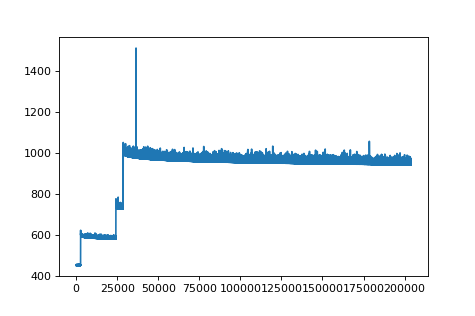

In [64]:
plot_iteration(a.cost_rate, min_it=700000)

<IPython.core.display.Javascript object>


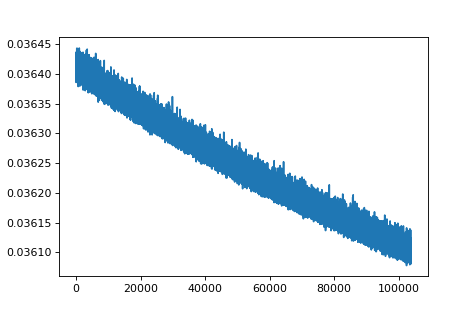

In [66]:
plot_iteration(a.rel_err, min_it=800000)

<IPython.core.display.Javascript object>


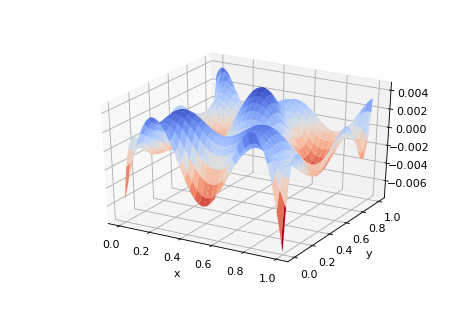

In [62]:
%matplotlib notebook
plot_fun(lambda x, y, p00, p01, p1, p2: nn.N(x, y, p00, p01, p1, p2) - nn.psi_a(x, y), p00=a.p00, p01=a.p01, p1=a.p1, p2=a.p2)

### Load parameters

In [3]:
name_str = '20200817-2018_eq1_2_v6'

par = np.load('output/' + name_str + '_nn_params.npz', allow_pickle=True)['arr_0']
a.p00 = par[0][0]
a.p01 = par[0][1]
a.p1 = par[1]
a.p2 = par[2]
a.cost_rate = list(np.load('output/' + name_str + '_cost_rate.npz')['arr_0'])
a.rel_err = list(np.load('output/' + name_str + '_rel_err.npz')['arr_0'])
a.m_t = np.load('output/' + name_str + '_momentum.npz')['arr_0']

In [58]:
a.save_result('eq1_2_v9')